# ⚠️⚠️⚠️⚠️⚠️ ***Attention*** ⚠️⚠️⚠️⚠️⚠️

Please specify your assigned GPU number.

In [ ]:
GPU_NUM = # put GPU number here

## Model Evaluation

##### This notebook demonstrates the evaluation of our trained model across two distinct datasets. We'll assess its performance using

##### 1. Internal test data: This is derived from the same source as our training data (**Data2**).
##### 2. External test data: We'll use an independent dataset (**Data3**) to gauge the model's generalization capabilities.

##### By comparing results from both internal and external tests, we can gain insights into the model's robustness and its ability to handle diverse data.

In [1]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from glob import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

2024-08-13 13:25:42.021620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 13:25:42.037200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 13:25:42.037251: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 13:25:42.049606: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-13 13:25:43.082106: W tensorflow/compiler/tf

In [ ]:
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ['CUDA_LAUNCH_BLOCKING'] = "0"
os.environ["CUDA_VISIBLE_DEVICES"] = str(GPU_NUM)

In [3]:
# Define a function for image preprocessing 

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0

In [4]:
# Load Data2 model
model = load_model('./weights/best_model_Data2.keras')

2024-08-13 13:25:45.748507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1024 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:61:00.0, compute capability: 8.6


### Internal Validation

In [5]:
# Load and preprocess test images
positive_paths = glob('/fsx/embed/summer-school-24/Datathon24_SummerSchool_CXR/Data2_Preprocessed/test/positive/*.png')
negative_paths = glob('/fsx/embed/summer-school-24/Datathon24_SummerSchool_CXR/Data2_Preprocessed/test/negative/*.png')
test_image_paths = positive_paths + negative_paths  # Add all test image paths
test_labels = [1]*len(positive_paths) + [0]*len(negative_paths)  # Add corresponding true labels (0 or 1 for binary classification)

X_test = np.vstack([load_and_preprocess_image(img_path) for img_path in test_image_paths])
y_true = np.array(test_labels)

In [6]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Assuming 0.5 as threshold for binary classification

2024-08-13 13:25:53.695550: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 271552512 exceeds 10% of free system memory.
2024-08-13 13:25:53.831784: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 271552512 exceeds 10% of free system memory.
I0000 00:00:1723569954.975465 1005961 service.cc:145] XLA service 0x7f9eb8002fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723569954.975546 1005961 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2024-08-13 13:25:55.029564: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-13 13:25:55.349920: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-08-13 13:25:55.913448: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ra

10/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

I0000 00:00:1723569956.966459 1005961 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step


In [7]:
# Save evaluation results as csv
df_results = pd.DataFrame(test_image_paths, columns=['Path'])
df_results['Label'] = y_true
df_results['Prediction'] = y_pred
df_results['Probability'] = y_pred_prob
df_results.to_csv('./results/Model2_TestSet.csv', index=False)
df_results

,Path,Label,Prediction,Probability
0,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,1,0.827520
1,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,1,0.625199
2,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,1,0.666085
3,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,0,0.436517
4,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,1,0.862866
...,...,...,...,...
446,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,0,0,0.033249
447,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,0,0,0.081675
448,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,0,0,0.023007
449,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,0,0,0.493844


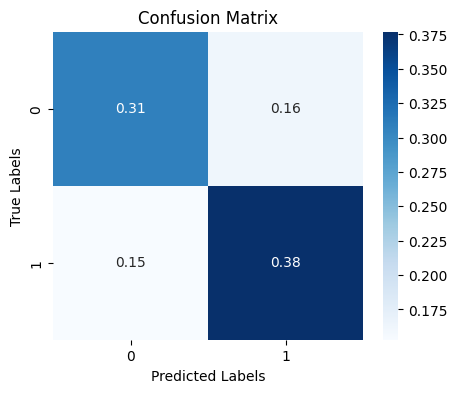

In [8]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='all')

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [9]:
# Calculate metrics
auc = roc_auc_score(y_true, y_pred_prob)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
ppv = precision_score(y_true, y_pred)  # PPV is the same as precision
sensitivity = recall_score(y_true, y_pred)  # Sensitivity is the same as recall
specificity = recall_score(y_true, y_pred, pos_label=0)  # Specificity is recall of the negative class

# Print results
print(f"AUC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"PPV (Precision): {ppv:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

AUC: 0.7586
F1 Score: 0.7054
Accuracy: 0.6851
PPV (Precision): 0.6996
Sensitivity (Recall): 0.7113
Specificity: 0.6557


### External Validation

In [10]:
# Load and preprocess test images
positive_paths = glob('/fsx/embed/summer-school-24/Datathon24_SummerSchool_CXR/Data3_Preprocessed/positive/*.png')
negative_paths = glob('/fsx/embed/summer-school-24/Datathon24_SummerSchool_CXR/Data3_Preprocessed/negative/*.png')
test_image_paths = positive_paths + negative_paths  # Add all test image paths
test_labels = [1]*len(positive_paths) + [0]*len(negative_paths)  # Add corresponding true labels (0 or 1 for binary classification)

X_test = np.vstack([load_and_preprocess_image(img_path) for img_path in test_image_paths])
y_true = np.array(test_labels)

In [11]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Assuming 0.5 as threshold for binary classification

 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

2024-08-13 13:26:08.574779: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 332967936 exceeds 10% of free system memory.
2024-08-13 13:26:08.736678: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 332967936 exceeds 10% of free system memory.


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


In [12]:
# Save evaluation results as csv
df_results = pd.DataFrame(test_image_paths, columns=['Path'])
df_results['Label'] = y_true
df_results['Prediction'] = y_pred
df_results['Probability'] = y_pred_prob
df_results.to_csv('./results/Model2_External.csv', index=False)
df_results

,Path,Label,Prediction,Probability
0,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,1,0.658327
1,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,1,0.738909
2,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,1,0.806033
3,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,0,0.140540
4,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,1,1,0.821423
...,...,...,...,...
548,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,0,1,0.802847
549,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,0,0,0.058846
550,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,0,0,0.098574
551,/home/fli40/Data/Datathon24_SummerSchool_CXR/D...,0,0,0.141706


### It is observed that the performance of Model2 did not drop as much as that of Model1 !

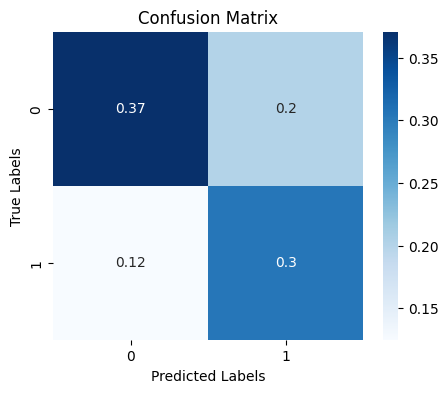

In [13]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='all')

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [14]:
# Calculate metrics
auc = roc_auc_score(y_true, y_pred_prob)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
ppv = precision_score(y_true, y_pred)  # PPV is the same as precision
sensitivity = recall_score(y_true, y_pred)  # Sensitivity is the same as recall
specificity = recall_score(y_true, y_pred, pos_label=0)  # Specificity is recall of the negative class

# Print results
print(f"AUC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"PPV (Precision): {ppv:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

AUC: 0.7659
F1 Score: 0.6512
Accuracy: 0.6745
PPV (Precision): 0.6022
Sensitivity (Recall): 0.7089
Specificity: 0.6487
